In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import scipy.stats as stats

In [2]:
# Load the data
df = pd.read_csv("./hr_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

([<matplotlib.axis.XTick at 0x1d6d190dac0>,
 [Text(0, 0, "Didn't leave"), Text(1, 0, 'Left')])

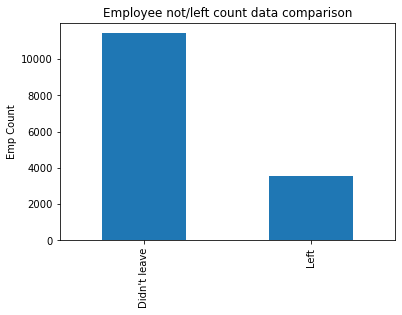

In [6]:
df["left"].value_counts().plot(kind='bar')
plt.ylabel('Emp Count')
plt.title('Employee not/left count data comparison')
plt.xticks((0, 1), ["Didn't leave", "Left"])

(8.5, -0.5)

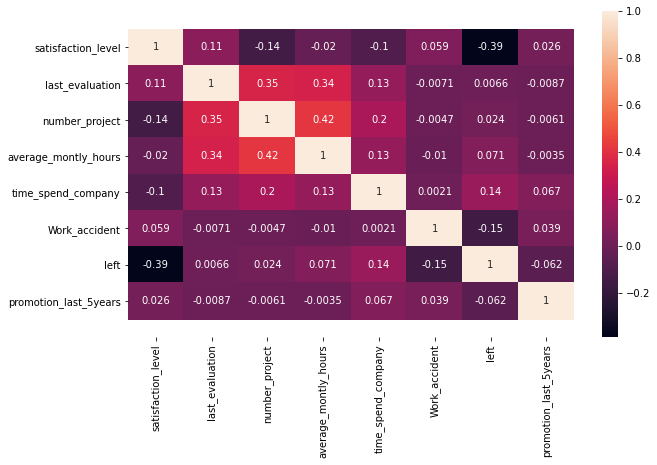

In [7]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(df.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

From above correlation we can observe that
- **Negative Correlation** between Satisfaction level(-0.39), Work Accident , Promotion last 5 years i.e. can be interpretated
  as person leave company when they are less satisfied
- **Positive Correlation** between Last evaluation, number_project, average monthly hours,time spend company

As we can see satisfaction level has highest value with our dependent value ,let's test to see whether the average satisfaction level of employees that had a turnover differs from the those that had no turnover.

Hypothesis Testing - Is there difference in Satisfaction level mean of the employee who had turnover and who had not turnover

Null Hypothesis (Ho) - There is no differnece in satisfaction level
Alternate Hypothesis(Ha)- There is a difference between satisfcation level of employee


In [8]:
emp_satisfaction = df[df['left'] == 0]['satisfaction_level'].mean()
emp_turnover_satisfaction = df[df['left']==1]['satisfaction_level'].mean()

print("Satisfaction level mean for employeed who had not left:" ,emp_satisfaction)
print("Satisfaction level mean for employeed who had left:" ,emp_turnover_satisfaction)

Satisfaction level mean for employeed who had not left: 0.666809590479516
Satisfaction level mean for employeed who had left: 0.44009801176140917


In [9]:
stats.ttest_1samp(a=  df[df['left']==0]['satisfaction_level'],popmean = emp_turnover_satisfaction) 

Ttest_1sampResult(statistic=111.63271389530792, pvalue=0.0)

#### T test Result
The test result shows the test statistic "t" is equal to -51.33. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

In [10]:
degree_freedom = len(df[df['left']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


Reject the null hypothesis because:

- T-Test score is outside the quantiles
- P-value is lower than confidence level of 5%

#### Conclusion Of T test

We dont have strong evidence in favour of Null Hypothesis So we reject it But for practical significance we have to do further more experiments.


In [11]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

Text(0.5, 1.0, 'mean of satisfaction level for left and Not left Employee')

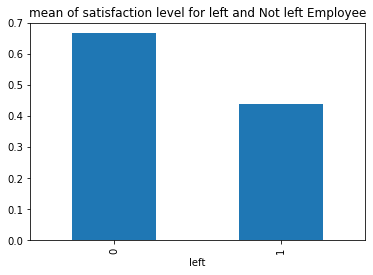

In [12]:
df.groupby('left')['satisfaction_level'].mean().plot(kind='bar')
plt.title('mean of satisfaction level for left and Not left Employee')

In [13]:
df.groupby('left')['average_montly_hours'].mean()

left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

[Text(0, 0.5, 'Percent')]

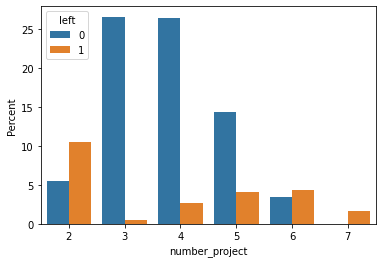

In [14]:
df.groupby('left')['number_project'].mean()
ax = sns.barplot(x="number_project", y="number_project", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Text(0.5, 1.0, 'salary basis Employee who had left or not left count')

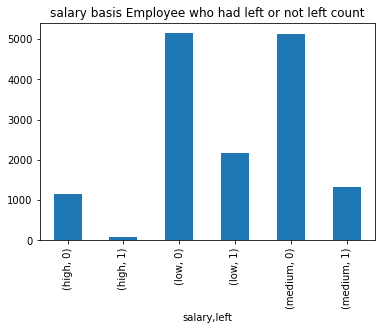

In [15]:
df.groupby('salary')['left'].value_counts().plot(kind='bar')
plt.title('salary basis Employee who had left or not left count')

In [16]:
df.groupby('left')['last_evaluation'].mean()

left
0    0.715473
1    0.718113
Name: last_evaluation, dtype: float64

Text(0.5, 1.0, 'Time spend at company who had left or not left count')

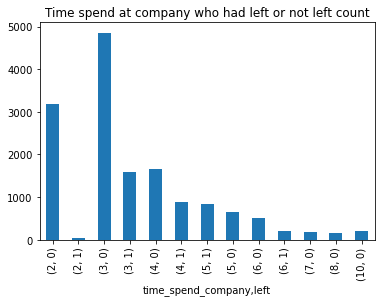

In [17]:
df.groupby('time_spend_company')['left'].value_counts().plot(kind='bar')
plt.title('Time spend at company who had left or not left count')

##### From above exploration we can observe that satisfaction level difference in case of Employee who had turnover and who had not.In case of number of project vs turnover if employee having less project left more also in case of employee who have more projects left more , there might be the reason of Satisfcation level , work accident, time spend or salary

We have to do further more experiments to get the reason for turnover

### Data Preprocessing

In [18]:

# Rename Sales feature to department
df = df.rename(columns={"sales": "department"})

# Salary to ordinal
salary_map = {"low": 0, "medium": 1, "high": 2}
df["salary"] = df["salary"].map(salary_map)

# Create dummy variables for department feature
df = pd.get_dummies(df, columns=["department"], drop_first=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [19]:
df.shape

(14999, 18)


#### Imbalance dataset   
- metric F1-score or AUC(area under ROC curve) 

There are three ways to deal with this issue:
- upsampling
- downsampling
- generating synthetic points

In [20]:
# train and test sets: 80/20
X = df.loc[:, df.columns != "left"].values
y = df.loc[:, df.columns == "left"].values.ravel()
X= StandardScaler().fit(X).transform(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
# Upsample minor class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)
X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))
print(y_train_u.shape)

# Downsample major class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

print("Original shape:", X_train.shape)
print("Upsampled shape:", X_train_u.shape)
print("Downsampled shape:", X_train_d.shape)

[1 1 1 ... 1 1 1]
(18284,)
Original shape: (11999, 17)
Upsampled shape: (18284, 17)
Downsampled shape: (5714, 17)


#### Dimensionality Reduction : PCA

[0.1078147  0.07975255 0.07766479 0.07081241 0.06759775 0.06443285
 0.0628709  0.06239438 0.06201072 0.06156182 0.05722036 0.05238222
 0.05020699 0.04843102 0.03701255 0.03213212 0.00570187]
[0.1078147  0.18756726 0.26523205 0.33604446 0.4036422  0.46807506
 0.53094596 0.59334034 0.65535106 0.71691288 0.77413324 0.82651546
 0.87672244 0.92515346 0.96216602 0.99429813 1.        ]


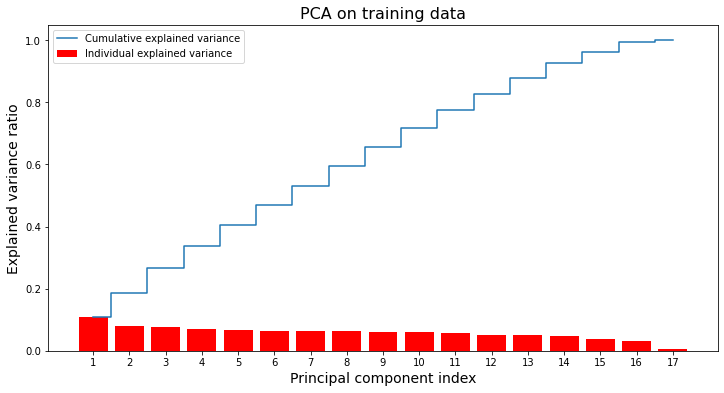

In [21]:

# Build PCA using standarized trained data
pca = PCA(n_components=None, svd_solver="full")
pca.fit(StandardScaler().fit_transform(X_train))
print(pca.explained_variance_ratio_)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 18), pca.explained_variance_ratio_, align="center",
        color='red', label="Individual explained variance")
plt.step(range(1, 18), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.xticks(range(1, 18))
plt.legend(loc="best")
plt.xlabel("Principal component index", {"fontsize": 14})
plt.ylabel("Explained variance ratio", {"fontsize": 14})
plt.title("PCA on training data", {"fontsize": 16});
print(cum_var_exp)

PCA to check maximum the variation in the data.
**PCA is not required** as much as it has 17 feature with better interpretation 
it almost similar variation and takes around 14,15,16 component for maximum vairation so No need 
of PCA as all features are in descent 

### Model Training

#### Creating dictionary for different sampled data

In [22]:
# Build random forest classifier
method_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "Downsampled": (X_train_d, y_train_d)}    
    

#### Grid search RandomForest hyperparam using pipeline

In [23]:
pipe = Pipeline([('sc', StandardScaler()), ('clf', RandomForestClassifier())])
param_grid = [{"clf__n_estimators": [10, 50, 100],"clf__max_features": ["sqrt", "log2", 0.4, 0.5],"clf__min_samples_leaf": [1, 3, 5],"clf__criterion": ["gini", "entropy"]}]
gs = GridSearchCV(pipe, param_grid,scoring="f1",cv=3)
for data_i in method_data.keys():
    gs.fit(method_data[data_i][0],method_data[data_i][1])
    print(data_i)
    print(gs.best_params_)
    print(gs.best_score_)
    

Original
{'clf__criterion': 'gini', 'clf__max_features': 0.5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 100}
0.9766753654690158
Upsampled
{'clf__criterion': 'gini', 'clf__max_features': 0.5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 50}
0.9971003656546505
Downsampled
{'clf__criterion': 'entropy', 'clf__max_features': 0.4, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 100}
0.979348322999507


#### we can see upsampled data giving much higher accuracy we ll select upsampled data as our Xtrain ytrain

In [24]:
X_train, y_train = np.copy(X_train_u), np.copy(y_train_u)
# Delete original and downsampled data
#del X_train_u, y_train_u, X_train_d, y_train_d

### Random Forest Model

In [25]:
pipeline_rf = Pipeline([('sc',StandardScaler()),('clf',RandomForestClassifier(n_estimators=100,
                                              criterion="entropy",
                                              max_features=0.5,
                                              min_samples_leaf=1))])


#### Grid search Gradient Boosting hyperparam using pipeline

In [26]:
pipe = Pipeline([('sc', StandardScaler()), ('clf', GradientBoostingClassifier())])
param_grid = [{"clf__n_estimators": [10, 50, 100],"clf__max_features": ["sqrt", "log2", 0.4, 0.5],\
               "clf__learning_rate": [0.001, 0.01, 0.1],"clf__max_depth": [1, 2, 3]}]
gs_gb = GridSearchCV(pipe, param_grid,scoring="f1",cv=3)
gs_gb.fit(X_train,y_train)
print(gs_gb.best_params_)
print(gs_gb.best_score_)

{'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__max_features': 0.5, 'clf__n_estimators': 100}
0.9592022829873722


### Gradient Boosting Classifier

In [27]:
pipeline_gb = Pipeline([('sc',StandardScaler()),('clf',GradientBoostingClassifier(n_estimators=100,
                                              learning_rate=0.1,
                                              max_features=0.4,
                                              max_depth=3))])

#### Grid search KNN hyperparam using pipeline

In [28]:
#remember double __ after clf for param grid
pipe = Pipeline([('sc', StandardScaler()), ('clf', KNeighborsClassifier())])
param_grid = [{"clf__n_neighbors": range(1,15),"clf__weights": ['uniform','distance']}]
gs_knn = GridSearchCV(pipe, param_grid,scoring="f1",cv=3)
gs_knn.fit(X_train,y_train)
print(gs_knn.best_params_)
print(gs_knn.best_score_)

{'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
0.976594797982972


### K Nearest Neighbor Classifier

In [29]:
pipeline_knn = Pipeline([('sc',StandardScaler()),('clf',KNeighborsClassifier(n_neighbors=1,weights='uniform'))])

#### Grid search Logistic regression hyperparam using pipeline

In [30]:
pipe = Pipeline([('sc', StandardScaler()), ('clf', LogisticRegression())])
param_grid = [{"clf__C": np.arange(0.5,20,0.5),'clf__fit_intercept':[True, False]}]
gs_logReg = GridSearchCV(pipe, param_grid,scoring="f1",cv=3)
gs_logReg.fit(X_train,y_train)
print(gs_logReg.best_params_)
print(gs_logReg.best_score_)

{'clf__C': 0.5, 'clf__fit_intercept': False}
0.7811087630983323


### Logisitic Regression Model

In [31]:
pipeline_logReg = Pipeline([('sc',StandardScaler()),\
                            ('clf',LogisticRegression(fit_intercept=False,C=0.5))])

#### Grid search SVC hyperparam using pipeline

In [32]:
pipe = Pipeline([('sc', StandardScaler()), ('clf', SVC())])
param_grid = [{"clf__C": [0.001, 0.01, 0.1, 1, 10],'clf__gamma':[0.001, 0.01, 0.1, 1]}]
gs_svm= GridSearchCV(pipe, param_grid,scoring="f1",cv=3)
gs_svm.fit(X_train,y_train)
print(gs_svm.best_params_)
print(gs_svm.best_score_)

{'clf__C': 10, 'clf__gamma': 1}
0.9866369958771743


### Support Vector Classifier

In [33]:
pipeline_svm = Pipeline([('sc',StandardScaler()),('clf',SVC(gamma=1,C=10))])

### Evaluation

In [34]:
## Lets make the list of pipelines
pipelines = [pipeline_rf, pipeline_gb, pipeline_knn,pipeline_logReg,pipeline_svm]

In [35]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [36]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'RandomForest',1: 'Gradient Boosting',2:'KNN',3:'Logistic Regression', 4: 'SVM' }

In [37]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [38]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {:.2f}%".format(pipe_dict[i],model.score(X_test,y_test)*100))
    print("{} F1 Score: {:.2f}%".format(pipe_dict[i],metrics.f1_score(y_test, model.predict(X_test))*100))

RandomForest Test Accuracy: 99.23%
RandomForest F1 Score: 98.37%
Gradient Boosting Test Accuracy: 96.70%
Gradient Boosting F1 Score: 93.17%
KNN Test Accuracy: 97.23%
KNN F1 Score: 94.33%
Logistic Regression Test Accuracy: 75.80%
Logistic Regression F1 Score: 61.09%
SVM Test Accuracy: 97.87%
SVM F1 Score: 95.51%


In [39]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


#### As per best accuracy score and F1 score we have selected Random forest Classifier 

area under cover 0.99


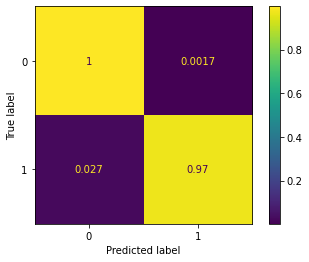

In [40]:
# Plot confusion matrix and ROC curve
metrics.plot_confusion_matrix(pipeline_rf, X_test, y_test,normalize='true')
print("area under cover {:.2f}".format(metrics.roc_auc_score(y_test, pipeline_rf.predict(X_test))))

[13 12  8  6  9 11 10 15 16  5 14  7  1  2  3  4  0]
[ 0  4  3  2  1  7 14  5 16 15 10 11  9  6  8 12 13]


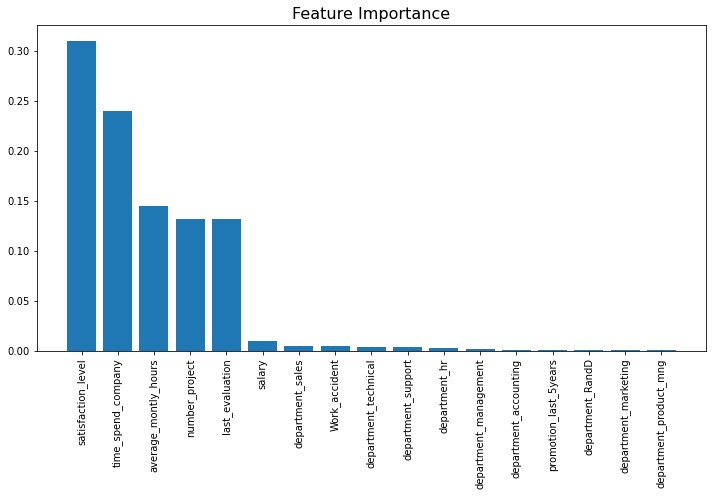

In [41]:
clf_rf = RandomForestClassifier(n_estimators=100,criterion="entropy",max_features=0.5,min_samples_leaf=1)


clf_rf.fit(StandardScaler().fit_transform(X_train), y_train)

# Plot features importance
importances = clf_rf.feature_importances_
print(np.argsort(clf_rf.feature_importances_))
indices = np.argsort(clf_rf.feature_importances_)[::-1]
print(indices)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 18), importances[indices], align="center")
plt.xticks(range(1, 18), df.columns[df.columns != "left"][indices], rotation=90)
plt.title("Feature Importance", {"fontsize": 16});

### Conclusion 

- Employee **satisfaction** is the **highest indicator** for employee turnover
- Employee **satisfaction, time spend in company,yearsAtCompany, and evaluation** were the four biggest factors in determining turnover.
- Based on above model to improve Employee Turnover Manger should focus on priorly satisfaction, time spend in company, yearsAtCompany, and evaluation of employee.
